<a href="https://colab.research.google.com/github/rishi-29-02/Aspiration-Career-Launcher/blob/main/Module_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 5

In this module, We’ll be looking at investment portfolio optimization with python, the fundamental concept of diversification and the creation of an efficient frontier that can be used by investors to choose specific mixes of assets based on investment goals; that is, the trade off between their desired level of portfolio return vs their desired level of portfolio risk.

Modern Portfolio Theory suggests that it is possible to construct an "efficient frontier" of optimal portfolios, offering the maximum possible expected return for a given level of risk. It suggests that it is not enough to look at the expected risk and return of one particular stock. By investing in more than one stock, an investor can reap the benefits of diversification, particularly a reduction in the riskiness of the portfolio. MPT quantifies the benefits of diversification, also known as not putting all of your eggs in one basket.

#5.1

For your chosen stock, calculate the mean daily return and daily standard deviation of returns, and then just annualise them to get mean expected annual return and volatility of that single stock. ( annual mean = daily mean 252 , annual stdev = daily stdev sqrt(252) )

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
#from google.colab import files
#uploaded = files.upload()

In [51]:
data = pd.read_csv('HINDUNILVR.csv')
data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,HINDUNILVR,EQ,15-May-2017,980.20,981.30,988.85,974.55,982.50,983.25,980.72,734446,7.202888e+08,32976,420159,57.21
1,HINDUNILVR,EQ,16-May-2017,983.25,983.00,1002.50,982.05,999.50,1000.40,994.00,1503815,1.494798e+09,39717,669576,44.53
2,HINDUNILVR,EQ,17-May-2017,1000.40,1004.00,1012.00,991.10,1009.00,1009.40,1003.84,1999387,2.007056e+09,63210,996054,49.82
3,HINDUNILVR,EQ,18-May-2017,1009.40,1008.00,1009.00,983.00,987.50,990.25,997.56,2690943,2.684374e+09,78098,983594,36.55
4,HINDUNILVR,EQ,19-May-2017,990.25,1000.00,1022.75,1000.00,1004.10,1008.00,1009.97,3059815,3.090316e+09,57429,1523108,49.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,HINDUNILVR,EQ,07-May-2019,1668.90,1678.80,1710.90,1672.50,1697.50,1697.50,1700.33,2212617,3.762183e+09,83971,1248858,56.44
491,HINDUNILVR,EQ,08-May-2019,1697.50,1697.50,1697.50,1675.00,1690.15,1688.70,1686.13,1243338,2.096428e+09,105328,849935,68.36
492,HINDUNILVR,EQ,09-May-2019,1688.70,1680.10,1713.00,1677.00,1702.45,1703.75,1695.24,1204995,2.042757e+09,96629,821111,68.14
493,HINDUNILVR,EQ,10-May-2019,1703.75,1708.95,1709.00,1678.50,1686.00,1687.45,1694.39,1000696,1.695567e+09,98364,581135,58.07


In [52]:
returns = data['Close Price'].pct_change().dropna()
print('Mean daily return : ', returns.mean())
print('Daily Std deviations : ', returns.std())
print('Annual mean :', returns.mean() * 252)
print('Annual std:', returns.std() * np.sqrt(252))

Mean daily return :  0.0011856032175239304
Daily Std deviations :  0.012211153040268803
Annual mean : 0.29877201081603044
Annual std: 0.19384604499540928


# 5.2

Now, we need to diversify our portfolio. Build your own portfolio by choosing any 5 stocks, preferably of different sectors and different caps. Assume that all 5 have the same weightage, i.e. 20% . Now calculate the annual returns and volatility of the entire portfolio ( Hint : Don't forget to use the covariance )

In [53]:
#from google.colab import files
#uploaded = files.upload()

In [54]:
df_bajaj = pd.read_csv('BAJFINANCE.csv')
df_raymond = pd.read_csv('RAYMOND.csv')
df_suntv = pd.read_csv('SUNTV.csv')
df_tatapower = pd.read_csv('TATAPOWER.csv')
df_titan = pd.read_csv('TITAN.csv')

df_stocks = pd.DataFrame({'BAJFINANCE':df_bajaj['Close Price'],
                          'RAYMOND': df_raymond['Close Price'],
                          'SUNTV': df_suntv['Close Price'],
                          'TATAPOWER': df_tatapower['Close Price'],
                          'TITAN': df_titan['Close Price']})
df_stocks.dropna(inplace=True)
df_stocks

,BAJFINANCE,RAYMOND,SUNTV,TATAPOWER,TITAN
0,1332.95,772.80,912.20,83.55,483.65
1,1347.75,785.00,894.70,83.85,488.30
2,1324.80,783.65,887.05,85.35,481.75
3,1314.55,746.95,871.35,83.75,471.65
4,1289.15,723.10,852.40,84.15,471.15
...,...,...,...,...,...
489,3034.30,808.95,551.10,65.85,1145.05
490,3017.05,807.10,528.90,64.35,1082.85
491,2921.30,805.30,540.70,64.50,1086.50
492,2971.35,804.40,541.15,64.40,1088.70


In [55]:
# Convert the daily stocks prices into daily returns
returns = df_stocks.pct_change().dropna()


# Calculate the mean daily return and covariance
daily_mean = returns.mean()
cov_matrix = returns.cov()

In [56]:
# array holding the portfolio weights of each stocks
weights = np.asarray([0.2, 0.2, 0.2, 0.2, 0.2])

# calculate the annualized portfolio return 
portfolio_return = np.sum(daily_mean*weights) * 252

# calculate the annualized portfolio volatility
portfolio_std_dev = np.sqrt(np.dot(weights.T, (np.dot(cov_matrix, weights)))) * np.sqrt(252)

print('Portfolio expected annual return is {} and volatility is {}'.format(portfolio_return, portfolio_std_dev))

Portfolio expected annual return is 0.13984684574676476 and volatility is 0.20633708619580043


#5.3 & 5.4

Prepare a scatter plot for differing weights of the individual stocks in the portfolio , the axes being the returns and volatility. Colour the data points based on the Sharpe Ratio ( Returns/Volatility) of that particular portfolio.

Mark the 2 portfolios where:

Portfolio 1 - The Sharpe ratio is the highest

Portfolio 2 - The volatility is the lowest.

In [57]:
# list of stocks in the portfolio
stocks = df_stocks.columns

# set the number of returns of ransom portfolio returns
num_portfolios = 25000

# set up array to hold results
# We have to increase the size of the array to hold the weight values of each stocks
results = np.zeros((4+len(stocks)-1, num_portfolios))

for i in range(num_portfolios): 
  # select random weights for portfolio holdings
  weights = np.array(np.random.random(5))
  # rebalce weights to sum upto 1
  weights = weights/np.sum(weights)

  # calculate the portfolio return and volatility
  portfolio_return = np.sum(daily_mean* weights) * 252
  portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)

  # store results in the results array
  results[0, i] = portfolio_return
  results[1, i] = portfolio_std_dev

  # store the shape ration - (return/volatility) - risk free rate element excluded for simplicity
  results[2, i] = portfolio_return/portfolio_std_dev

  # iterate through the weight vector and add the data to the results array
  for j in range(len(weights)):
    results[j+3, i] = weights[j]

# convert the results array into pandas dataframe
results_frame = pd.DataFrame(results.T, columns=['returns', 'stddev', 'sharpe',
                                                 stocks[0], stocks[1], stocks[2], stocks[3], stocks[4]])
results_frame

,returns,stddev,sharpe,BAJFINANCE,RAYMOND,SUNTV,TATAPOWER,TITAN
0,0.088547,0.212090,0.417499,0.073302,0.264284,0.165044,0.291647,0.205723
1,0.150807,0.205654,0.733305,0.170046,0.243207,0.148161,0.213159,0.225427
2,0.184737,0.225424,0.819509,0.335607,0.275692,0.050257,0.241640,0.096805
3,0.247564,0.197862,1.251198,0.283941,0.127173,0.098280,0.180462,0.310144
4,0.175223,0.204953,0.854940,0.125838,0.265397,0.069529,0.250240,0.288997
...,...,...,...,...,...,...,...,...
24995,0.163095,0.201906,0.807776,0.146645,0.175037,0.211052,0.165248,0.302018
24996,0.048610,0.219611,0.221346,0.058061,0.137433,0.373135,0.203225,0.228146
24997,0.173799,0.213253,0.814989,0.237942,0.211147,0.263193,0.054423,0.233295
24998,0.075559,0.230002,0.328513,0.132722,0.314779,0.068342,0.392821,0.091336


Create a scatter plot by coloured shape ratio

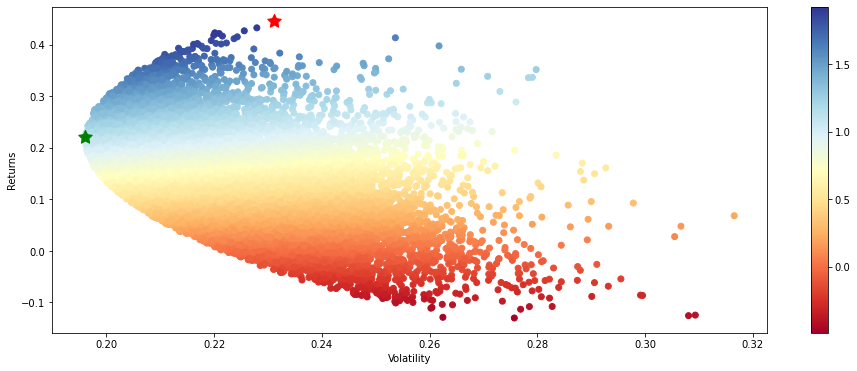

In [58]:
plt.figure(figsize=(16, 6))
plt.scatter(results_frame.stddev,results_frame.returns, c=results_frame.sharpe, cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()


# position of highest Sharpe ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]

# position where the volatility is lowest
min_vol_port = results_frame.iloc[results_frame['stddev'].idxmin()]

# plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1], max_sharpe_port[0], marker=(5, 1, 0), color='r', s=200)

# plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1], min_vol_port[0], marker=(5, 1, 0), color='g', s=200)

plt.show()